In [3]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd 
from tracker.utils.helper import process_df
from tracker.football_track_bytetrack import Football_bytetrack
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import LinearSegmentedColormap
from tracker.utils.helper import plot_heatmap
import pandas as pd
import numpy as np 






In [29]:
right_src = np.float32([[ 998.,  203.],
       [1717.,  200.],
       [1648.,  523.],
       [1026.,  708.]])

right_dst = np.float32([[1669.,  308.],
       [1886.,  312.],
       [1776.,  660.],
       [1670.,  770.]])

mid_src = np.float32([[ 725.,   94.],
       [1147.,   94.],
       [ 455.,  400.],
       [1427.,  397.]])

mid_dst = np.float32([[ 894.,   27.],
       [1014.,   27.],
       [ 813.,  540.],
       [1114.,  537.]])

left_src = np.float32([[195., 195.],
       [934., 196.],
       [896., 708.],
       [264., 524.]])
left_dst = np.float32([[ 33., 306.],
       [249., 307.],
       [252., 774.],
       [145., 667.]])

src = [right_src, mid_src, left_src]
dst = [right_dst, mid_dst, left_dst]

In [30]:
right = cv2.VideoCapture(r"C:\Users\menghang\Downloads\Telegram Desktop\Sequences\Sequences\Film Role-0 ID-1 T-2 m00s00-000-m00s00-185.avi")
mid = cv2.VideoCapture(r"C:\Users\menghang\Downloads\Telegram Desktop\Sequences\Sequences\Film Role-0 ID-3 T-2 m00s00-000-m00s00-185.avi")
left = cv2.VideoCapture(r"C:\Users\menghang\Downloads\Telegram Desktop\Sequences\Sequences\Film Role-0 ID-5 T-2 m00s00-000-m00s00-185.avi")
frame_id = 0
template = cv2.imread(r"C:\Users\menghang\development\football-server\tracker\inference\black.jpg")

right_data = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\right.txt")
mid_data = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\mid.txt")
left_data = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\left.txt")

data = [right_data, mid_data, left_data]

while True: 
    temp = template.copy()
    s1, r = right.read()
    s2, m = mid.read()
    s3, l = left.read()
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
       cv2.destroyAllWindows()
       break

    data_by_frame = []
    for df in data: 
        filtered_df = df[df["frame_id"] == frame_id]
        data_by_frame.append(filtered_df)  


    
    
    for df, s, d in zip(data_by_frame, src, dst): 
        position, labels, colors = process_df(df)
        M, _ = cv2.findHomography(s,d)
        position = np.array(position, dtype=np.float32).reshape(-1,1,2)
        position = cv2.perspectiveTransform(position, M)

        for player_position, label, color in zip(position, labels, colors):
            x, y = player_position[0]
            color = color.strip()
            
            if label == "ball": 
                cv2.circle(temp, (int(x),int(y)), 5, (0,255, 0), -1)

            elif color == "white":
                cv2.circle(temp, (int(x),int(y)), 5, (255, 255, 255), -1)
            elif color == "blue":
                cv2.circle(temp, (int(x),int(y)), 5, (255, 0, 0), -1)
                
    frame_id += 1

    cv2.imshow("2d", temp)

right.release()
mid.release()
left.release()        
    


In [32]:
mid_data = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\mid.txt")

M, _ = cv2.findHomography(mid_src, mid_dst)
position, _, _ = process_df(mid_data)
position = np.array(position, dtype=np.float32).reshape(-1,1,2)
position = cv2.perspectiveTransform(position, M)

x = position[:,:, 0].reshape(-1)
y = position[:, :, 1].reshape(-1)

mid_data["x_homo"] = x
mid_data["y_homo"] = y

mid_data.to_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\mid.txt")


In [4]:
left = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\left.txt")
right = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\right.txt")
mid = pd.read_csv(r"C:\Users\menghang\development\football-server\YOLOX_outputs\yolox_m_mix_det\track_vis\mid.txt")\

df = pd.concat([left,mid,right])
df["x_homo"] = df["x_homo"] / 1920 * 120
df["y_homo"] = df["y_homo"] / 1080 * 80

white = df[df["color"] == "white"][["x_homo", "y_homo"]]
blue = df[df["color"] == "blue"][["x_homo", "y_homo"]]
goal_keeper = df[df["id"] == 1][["x_homo", "y_homo"]]



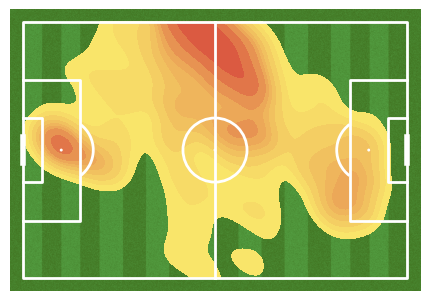

In [5]:
plot_heatmap(white["x_homo"], white["y_homo"])

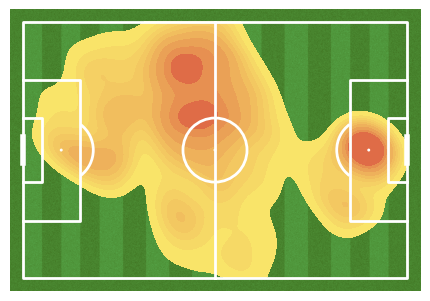

In [6]:
plot_heatmap(blue["x_homo"], blue["y_homo"])

<Axes: >

color
blue     1279
green       3
white       2
Name: count, dtype: int64

In [ ]:
import cv2
from tracker.utils.helper import fourPointOnClick
f1 = cv2.imread(r"C:\Users\menghang\development\football-server\image_demo\f1.jpg")
f2 = cv2.imread(r"C:\Users\menghang\development\football-server\image_demo\f2.jpg")
f3 = cv2.imread(r"C:\Users\menghang\development\football-server\image_demo\f3.jpg")
template = cv2.imread(r"C:\Users\menghang\development\football-server\tracker\inference\black.jpg")
f1p = fourPointOnClick(f1)
t1p = fourPointOnClick(template)

f2p = fourPointOnClick(f2)
t2p = fourPointOnClick(template)

f3p = fourPointOnClick(f3)
t3p = fourPointOnClick(template)

src = [f1p, f2p, f3p]
dst = [t1p, t2p, t3p]




In [ ]:

f3p = fourPointOnClick(f3)
t3p = fourPointOnClick(template)

In [ ]:
t3p

In [ ]:
from tracker.utils.perspective_transform import warp
imgOutput = warp(f3, f3p, t3p, (1920, 1080), True )